In [8]:
%matplotlib inline
from pprint import pprint
import itertools

from market import Returns_US_1871
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting
from metrics import average, mean, median
from withdrawal import ConstantWithdrawals, EM, VPW, ECM

In [14]:
def sim2(series):
    x = simulate_withdrawals(series, years=40, withdraw=VPW, portfolio=(500000,500000))
    stocks_prime = [n.portfolio_stocks / n.portfolio_n * 100 for n in x]
    portfolio_prime = [n.portfolio_n for n in x]   
    return (stocks_prime, portfolio_prime)

def sim3(series):
    x = simulate_withdrawals(series, years=40, withdraw=EM, portfolio=(600000,400000), harvesting=N_60_RebalanceHarvesting)
    stocks_prime = [n.portfolio_stocks / n.portfolio_n * 100 for n in x]
    portfolio_prime = [n.portfolio_n for n in x]   
    return (stocks_prime, portfolio_prime)


from decimal import setcontext, ExtendedContext, Decimal
setcontext(ExtendedContext)
import math

r = Returns_US_1871()
total = 0
bondzero = 0
lowest_bonds = []
highest_bonds = []
final_port = []
failures = 0
all_bonds = []
for year in range(1871, 2015):
    y = sim2(r.iter_from(year))
    if 100 in y[0]:
        #print('Bonds hit zero in %d' % year)
        bondzero += 1
    total += 1
    lowest_bonds.append(min(y[0]))
    highest_bonds.append(max(y[0]))
    final_port.append(y[1][-1])

    def f(x):
        if math.isnan(x):
            return Decimal(0)
        else:
            return x

    all_bonds.append(average(map(f, y[0])))
    if y[1][-1] == 0:
        failures += 1
        #print("Failure in", year)
print("Hit zero bonds", bondzero, "out of", total)
print("Failures", failures, "out of", total)
print("Bond average", average(all_bonds))
print("Lowest average", average(lowest_bonds), "Highest average", average(highest_bonds))
print("Final portfolio", average(final_port))
#print(average(filter(lambda x: x != 0, lowest_bonds)))

Hit zero bonds 111 out of 144
Failures 107 out of 144
Bond average 64.4054732338
Lowest average 39.8195322438 Highest average 93.4911528861
Final portfolio 310899.982333


59.9999999925


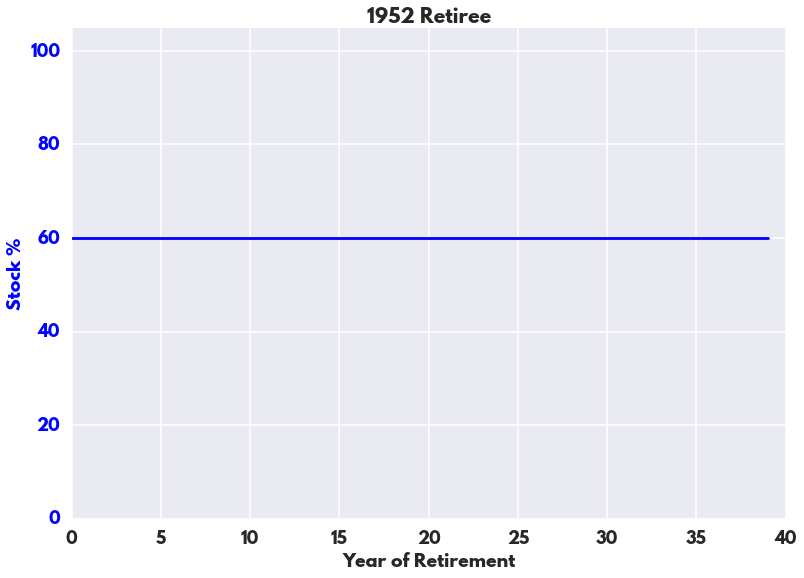

In [69]:
from plot import plot, plt, format_axis_labels_with_commas, plot_two

def p(bonds, portfolio):
    fig, ax1 = plt.subplots()
    ax1.plot(bonds, 'b')
    ax1.set_ylabel('Bonds Percentage', color='b')
    ax1.set_xlabel('Year of Retirement')
    ax1.set_ylim([0,100])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(portfolio, 'g')
    ax2.set_ylabel('Portfolio Value', color='g')
    ax2.set_ylim([0,2000000])
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    format_axis_labels_with_commas(ax2.get_yaxis())

    plt.xlabel('Year of Retirement')
    plt.title('Bonds versus Portfolio')
    plt.show()


r = Returns_US_1871()
year = 1952
y = sim3(r.iter_from(year))
print(average(y[0]))
plot(y[0], y_label='Stock %', x_label='Year of Retirement', y_lim=(0,105), title='%d Retiree' % year)

40
40


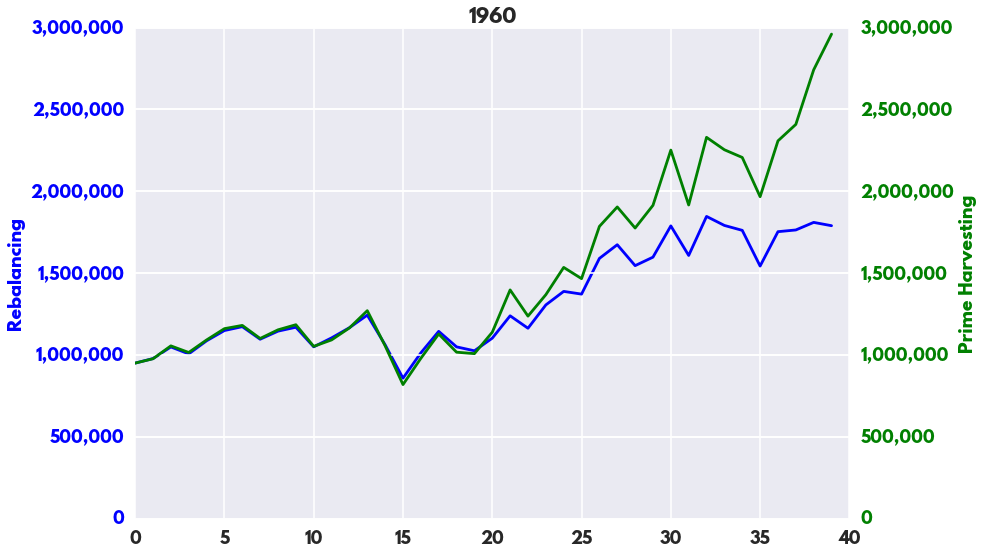

In [72]:
r = Returns_US_1871()
year = 1960
x = sim3(r.iter_from(year))
y = sim2(r.iter_from(year))

x_p = [n if not math.isnan(n) else 0 for n in x[1]]
y_p = [n if not math.isnan(n) else 0 for n in y[1]]

print(len(list(filter(lambda x: x != 0, x_p))))
print(len(list(filter(lambda x: x != 0, y_p))))

lim = None
#lim = (-3,103)
plot_two(x_p, y_p, y_lim=(0,3000000), title=year, s1_title='Rebalancing', s2_title='Prime Harvesting')

In [5]:
from harvesting import PrimeHarvesting
from withdrawal import EM
from portfolio import Portfolio

portfolio = Portfolio(392789,284434)
strategy = PrimeHarvesting(portfolio).harvest()
strategy.send(None)
withdrawal_strategy = EM(portfolio, strategy).withdrawals()
annual = []

# Withdrawals happen at the start of the year, so the first time
# we don't have any performance data to send them....
data = withdrawal_strategy.send(None)
annual.append(data)
years = 8
years -= 1

series = Returns_US_1871()

for _, d in zip(range(years), series.iter_from(2008)):
    data = withdrawal_strategy.send(d)
    annual.append(data)

for i in annual: print(i);print()


YearlyResults(returns=None, withdraw_n=Decimal('33861.15'), withdraw_r=Decimal('33861.15'), withdraw_pct_cur=Decimal('0.05'), withdraw_pct_orig=Decimal('0.05'), portfolio_n=Decimal('643361.85'), portfolio_r=Decimal('643361.85'), portfolio_bonds=Decimal('250572.85'), portfolio_stocks=Decimal('392789'))

YearlyResults(returns=Decimal('-0.206470304'), withdraw_n=Decimal('25591.4360'), withdraw_r=Decimal('25568.4244'), withdraw_pct_cur=Decimal('0.0501275141'), withdraw_pct_orig=Decimal('0.0377548081'), portfolio_n=Decimal('484935.297'), portfolio_r=Decimal('484499.248'), portfolio_bonds=Decimal('237635.343'), portfolio_stocks=Decimal('247299.954'))

YearlyResults(returns=Decimal('0.175418996'), withdraw_n=Decimal('26903.6141'), withdraw_r=Decimal('26167.6622'), withdraw_pct_cur=Decimal('0.0471991441'), withdraw_pct_orig=Decimal('0.0386396537'), portfolio_n=Decimal('543098.546'), portfolio_r=Decimal('528242.014'), portfolio_bonds=Decimal('224823.505'), portfolio_stocks=Decimal('318275.041')